In [89]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [90]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

In [91]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [92]:
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})

In [93]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [94]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [95]:
input_pbs = pd.read_csv('notebook8-LDAFeature-thispbs.csv')

In [96]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1, inplace=True)

In [97]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0,0.000000,0.000000,0.390909,0.000000,0.000000,0.000000,0.090266,0.000000,0.000000,0.000000,0.252755,0.210508
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0,0.000000,0.174502,0.000000,0.000000,0.000000,0.108335,0.000000,0.000000,0.000000,0.000000,0.642159,0.000000
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0,0.208703,0.013894,0.183520,0.013894,0.013894,0.013894,0.013894,0.013895,0.482727,0.013895,0.013894,0.013894
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1,0.260417,0.010419,0.010419,0.010419,0.010419,0.010419,0.135420,0.135354,0.010419,0.010419,0.010419,0.385459
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1,0.011907,0.154779,0.011907,0.154767,0.011907,0.011907,0.154622,0.297717,0.011907,0.011907,0.011907,0.154763


In [98]:
input_pbs.columns

Index(['headline', 'date', 'DOW', 'time', 'view', 'category', 'tag', 'hour',
       'numTag', 'token',
       ...
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11'],
      dtype='object', length=101)

In [99]:
# input_pbs['is_pos'] = (input_pbs['sentiment']=='pos')
# input_pbs['is_neg'] = (input_pbs['sentiment']=='neg')
# input_pbs['is_pos'] = input_pbs['is_pos'].astype(int)
# input_pbs['is_neg'] = input_pbs['is_neg'].astype(int)

In [100]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0,0.000000,0.000000,0.390909,0.000000,0.000000,0.000000,0.090266,0.000000,0.000000,0.000000,0.252755,0.210508
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0,0.000000,0.174502,0.000000,0.000000,0.000000,0.108335,0.000000,0.000000,0.000000,0.000000,0.642159,0.000000
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0,0.208703,0.013894,0.183520,0.013894,0.013894,0.013894,0.013894,0.013895,0.482727,0.013895,0.013894,0.013894
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1,0.260417,0.010419,0.010419,0.010419,0.010419,0.010419,0.135420,0.135354,0.010419,0.010419,0.010419,0.385459
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1,0.011907,0.154779,0.011907,0.154767,0.011907,0.011907,0.154622,0.297717,0.011907,0.011907,0.011907,0.154763


In [101]:
input_pbs_feature = input_pbs[['view', 'hour',
       'numTag',  'numToken', 'numChar', 'month', 'year',
        'timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation', 'is_environment',
       'is_politic', 'is_health', 'is_crime', 'is_social', 'is_inter',
       'is_sport', 'is_economic', 'is_region', 'is_science', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum', 'tag_top_worst_mean', 'num_tag_worst', 'is_pos',
       'is_neg','Topic 0','Topic 1','Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11']]

In [13]:
input_pbs.to_csv('notebook7-extractFeature-thispbs.csv')

In [47]:
input_pbs_feature.describe()

,view,hour,numTag,numToken,numChar,month,year,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
count,2.753800e+04,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.0,27538.0,27538.0,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.0,27538.000000,27538.0,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000,27538.000000
mean,2.455730e+03,13.481444,8.777035,8.450105,41.856417,6.411141,2560.104619,635.797625,6.190972,0.002615,1.692970,0.003305,0.111882,0.027054,0.264834,0.000109,0.021643,0.0,0.0,0.0,0.0,0.0,0.082831,0.115586,0.028797,0.147614,0.190791,0.100915,0.039001,0.065764,0.100261,0.0,0.026581,0.006500,0.044702,0.021970,0.001344,0.000327,0.004612,0.010785,0.001344,0.001961,0.742207,0.194636,0.003213,0.004975,0.0,0.0,0.000073,0.215230,0.029160,0.143983,0.0,0.183238,0.0,0.000617,0.000109,0.068596,0.175176,0.356271,0.683932,0.685555,0.159816,0.165916,0.164536,0.164972,0.158980,0.091437,0.094342,0.185780,456.929625,81.833866,4.749619,1.679679,1.004467,1.867892,1.014053,0.607379,0.334701,0.665299,0.106215,0.078857,0.073209,0.082836,0.103221,0.058607,0.082735,0.066708,0.072321,0.088930,0.102943,0.056346
std,1.272891e+04,4.386786,2.807466,2.558946,11.283529,3.480673,0.946236,339.857556,2.035551,0.053836,1.278104,0.057391,0.329533,0.163580,0.516903,0.010437,0.146512,0.0,0.0,0.0,0.0,0.0,0.275632,0.319733,0.167237,0.354724,0.392932,0.301222,0.193600,0.247873,0.300354,0.0,0.160860,0.080362,0.206652,0.146587,0.036631,0.018076,0.067755,0.103292,0.036631,0.044240,0.151670,0.134997,0.020316,0.070359,0.0,0.0,0.008522,0.471019,0.169761,0.382560,0.0,0.427959,0.0,0.024839,0.010437,0.268920,0.425814,0.614363,0.098170,0.094661,0.366442,0.372012,0.370768,0.371162,0.365664,0.288235,0.292310,0.388936,506.374207,90.154448,15.718019,3.944256,1.504595,5.342622,2.429076,1.066428,0.471894,0.471894,0.162100,0.143100,0.133104,0.127112,0.158584,0.108615,0.132979,0.114746,0.124358,0.146340,0.163789,0.099462
min,2.000000e+01,0.000000,1.000000,1.000000,4.000000,1.000000,2559.000000,-213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000

<function matplotlib.pyplot.show(*args, **kw)>

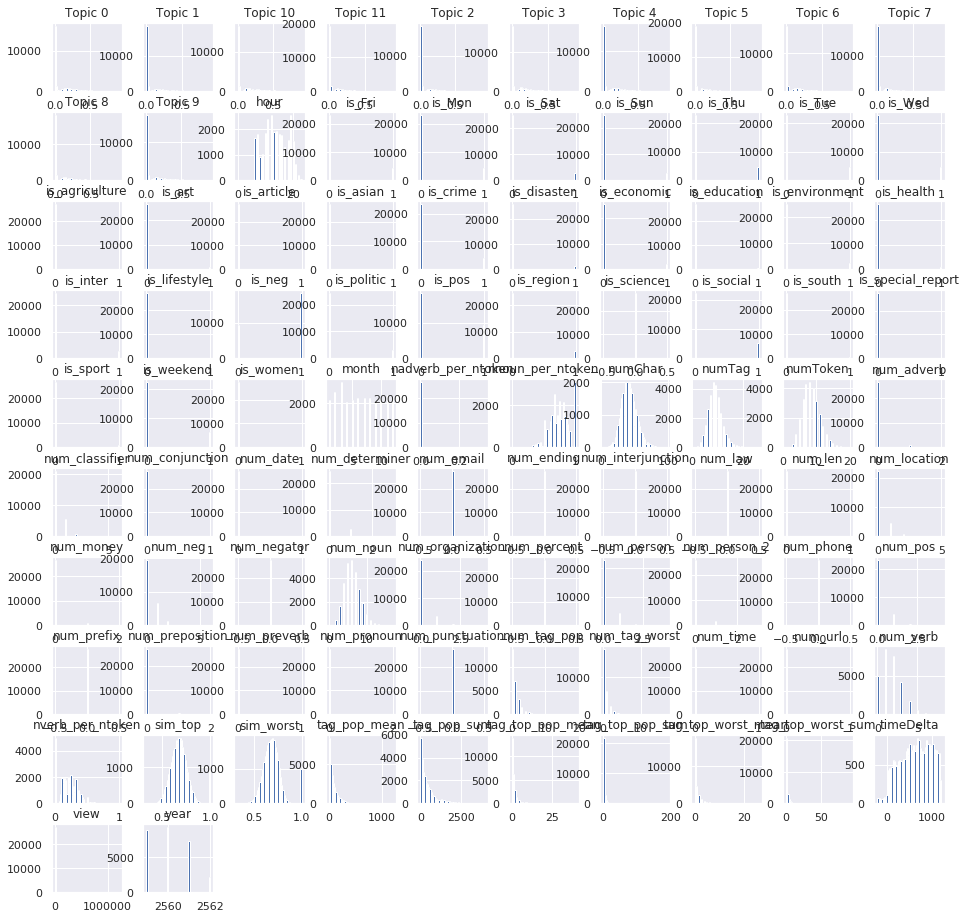

In [37]:
input_pbs_feature.hist(bins=50, figsize= (16,16))
plt.show

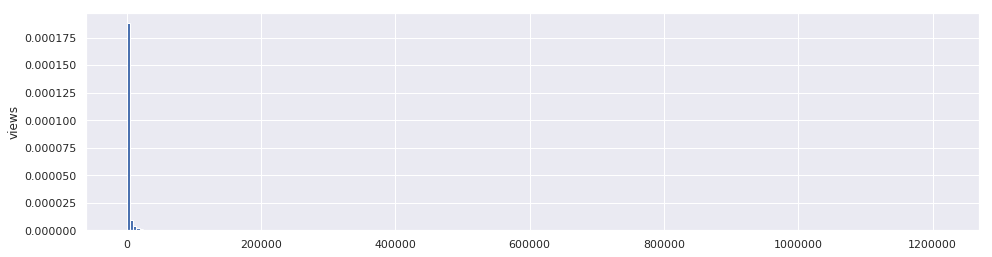

In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

x = input_pbs_feature['view']
plt.hist(x, normed=True, bins=250)
plt.ylabel('views');

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


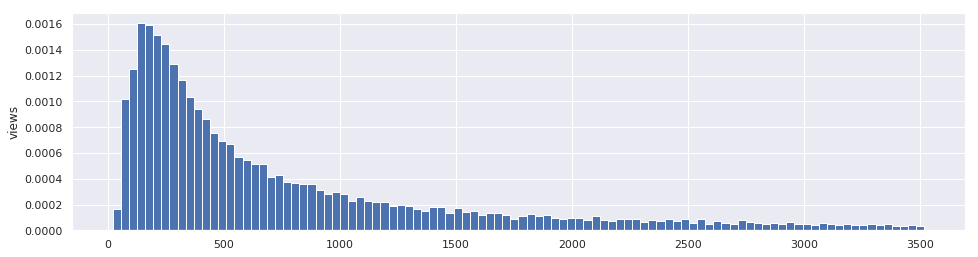

In [102]:
def reject_outliers():
    IQRval = input_pbs_feature['view'].describe().loc['75%']-input_pbs_feature['view'].describe().loc['25%']
    outlierMin = max(input_pbs_feature['view'].describe().loc['25%']-1.5*IQRval,0)
    outlierMax = input_pbs_feature['view'].describe().loc['75%']+1.5*IQRval
    filtered = input_pbs_feature[(input_pbs_feature['view']<=outlierMax) & (input_pbs_feature['view']>=outlierMin)]
#     MINVIEW = input_pbs_feature['view'].quantile(0.04)
#     MAXVIEW = input_pbs_feature['view'].quantile(0.96)
#     filtered = input_pbs_feature[(input_pbs_feature['view']<=MAXVIEW) & (input_pbs_feature['view']>=MINVIEW)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

input_pbs_feature = reject_outliers()
x = input_pbs_feature['view']
plt.hist(x, normed=True, bins=100)
plt.ylabel('views');

In [103]:
input_pbs_feature.shape

(24138, 92)

In [104]:
input_pbs_feature.drop(['num_interjunction','num_prefix','num_ending' ,'num_negator', 'num_punctuation', 'is_science', 
              'num_email',  'num_law',  'num_percent',  'num_phone'  ], axis=1,inplace=True)

In [52]:
corrmat = input_pbs_feature.corr()
pd.DataFrame(corrmat['view'].sort_values(ascending=False))

,view
view,1.000000
year,0.291824
num_tag_pop,0.202275
tag_top_pop_mean,0.164836
tag_top_pop_sum,0.151338
numTag,0.085472
is_social,0.085452
sim_top,0.076352
Topic 2,0.062761
is_environment,0.052832


In [58]:
with pd.option_context("display.max_rows", 1000):
    display(pd.DataFrame(corrmat['view'].sort_values(ascending=False)))

,view
view,1.000000
year,0.210739
num_tag_pop,0.186727
tag_top_pop_mean,0.176381
tag_top_pop_sum,0.172921
is_social,0.100842
sim_top,0.096128
numTag,0.060588
Topic 2,0.040696
tag_pop_sum,0.037392


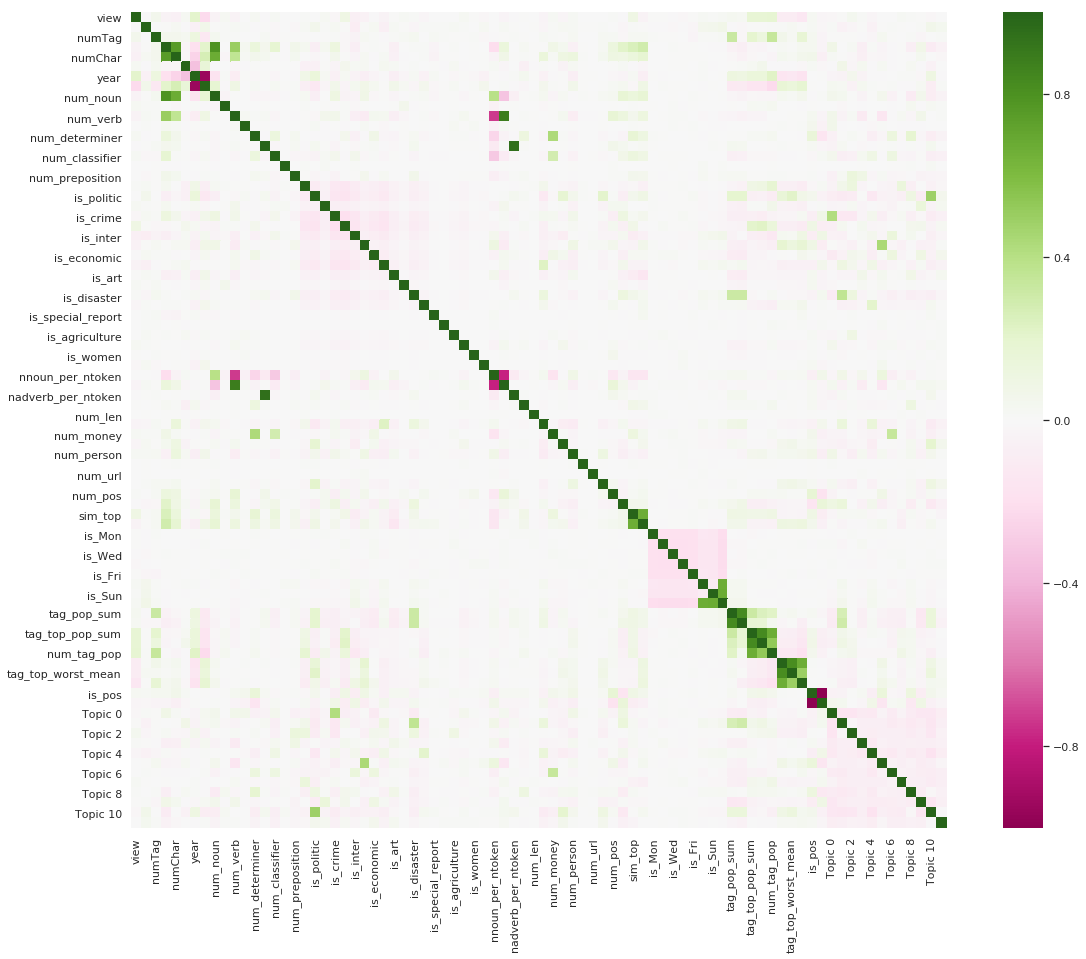

In [59]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=1, square=True,cmap="PiYG");
plt.show()

In [60]:
corrmat['view'].sort_values(ascending=False)[:16]

view                1.000000
year                0.210739
num_tag_pop         0.186727
tag_top_pop_mean    0.176381
tag_top_pop_sum     0.172921
is_social           0.100842
sim_top             0.096128
numTag              0.060588
Topic 2             0.040696
tag_pop_sum         0.037392
is_health           0.028037
month               0.027755
is_education        0.026684
num_determiner      0.024826
num_pronoun         0.024492
is_pos              0.024059
Name: view, dtype: float64

In [120]:
train_set, test_set = train_test_split(input_pbs_feature, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['view'], axis=1) #Dropping both 'shares', the predicted variable and 'url', a text variable
y_train_set = train_set['view']

X_test_set = test_set.drop(['view'], axis=1)
y_test_set = test_set['view']

In [121]:
input_pbs_feature.head()

,view,hour,numTag,numToken,numChar,month,year,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_len,num_location,num_money,num_organization,num_person,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,177,19,10,11,43,4,2562,0,8,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,1,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0,0.000000,0.000000,0.390909,0.000000,0.000000,0.000000,0.090266,0.000000,0.000000,0.000000,0.252755,0.210508
1,702,19,6,9,46,4,2562,0,8,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,1,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0,0.000000,0.174502,0.000000,0.000000,0.000000,0.108335,0.000000,0.000000,0.000000,0.000000,0.642159,0.000000
2,583,19,9,5,26,4,2562,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,1,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0,0.208703,0.013894,0.183520,0.013894,0.013894,0.013894,0.013894,0.013895,0.482727,0.013895,0.013894,0.013894
3,928,19,3,7,29,4,2562,0,4,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1,0.260417,0.010419,0.010419,0.010419,0.010419,0.010419,0.135420,0.135354,0.010419,0.010419,0.010419,0.385459
6,428,17,5,8,35,4,2562,0,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.875000,0.125000,0.0,0,0,1,0,0,0,0,0,0,0,0,0.512310,0.551208,0,0,0,0,1,0,0,0,25,8,2,2,1,0,0,0,0,1,0.120348,0.000000,0.000000,0.000000,0.000000,0.000000,0.453658,0.231515,0.000000,0.000000,0.120385,0.000000


### linear regression

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [124]:
# some_X_data = X_train_set.iloc[:500]
# some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(X_train_set),list(y_train_set) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

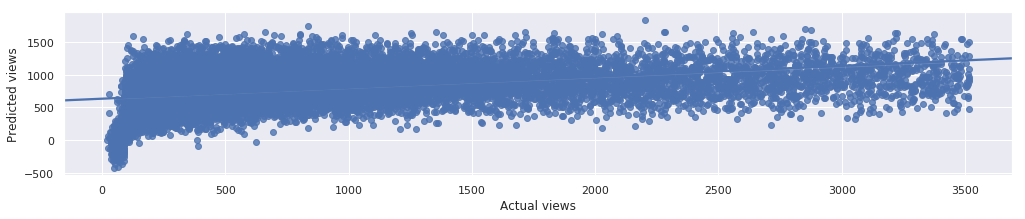

In [125]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

In [126]:
# some_X_data = X_train_set.iloc[:500]
# some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(X_test_set),list(y_test_set) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

AttributeError: module 'seaborn' has no attribute 'plt'

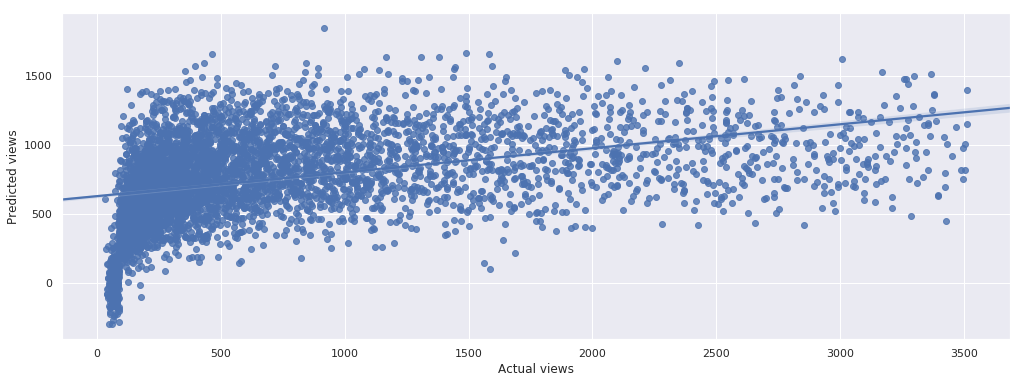

In [127]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


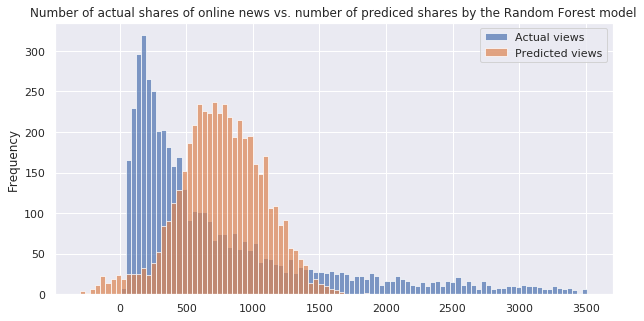

In [128]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [130]:
view_predictions = lin_reg.predict(X_test_set)
lin_mse = mean_squared_error(y_test_set, view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

690.7065569940308

In [131]:
print(lin_mse)
print(lin_rmse)

477075.54787454836
690.7065569940308


In [132]:
input_pbs_feature['view'].median()

457.0

In [133]:
lin_mae = mean_absolute_error(y_test_set, view_predictions)
print(lin_mae)

506.8443762757176


### Dicision Tree

In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [135]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_set, y_train_set)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [136]:
some_X_data = X_train_set.iloc[:20]
some_y_data = y_train_set.iloc[:20]
print("Predicted shares:", tree_reg.predict(some_X_data))
print("Actual shares   :", list(some_y_data))

Predicted shares: [ 489.  605. 1495.   71.   88.  449.  112. 1795.  299. 2674. 2410.  576.
 2645.  712.  371.  540. 2766.  536.  230. 3341.]
Actual shares   : [489, 605, 1495, 71, 88, 449, 112, 1795, 299, 2674, 2410, 576, 2645, 712, 371, 540, 2766, 536, 230, 3341]


In [137]:
view_predictions = tree_reg.predict(X_train_set)
tree_mse = mean_squared_error(y_train_set, view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [138]:
tree_mae = mean_absolute_error(y_train_set, view_predictions)
print(tree_mae)

0.0


In [139]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(tree_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,489,489.0
1,605,605.0
2,1495,1495.0
3,71,71.0
4,88,88.0


AttributeError: module 'seaborn' has no attribute 'plt'

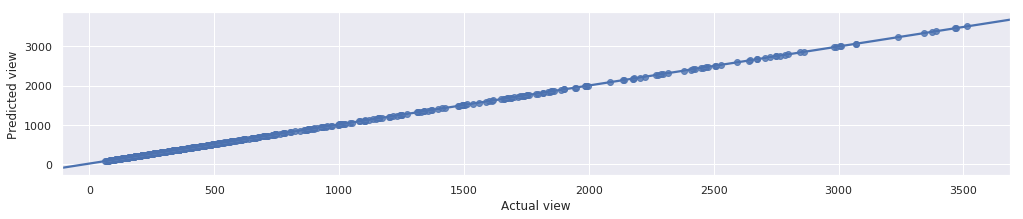

In [140]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

In [141]:
view_predictions = tree_reg.predict(X_test_set)
tree_mse = mean_squared_error(y_test_set, view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse #with outliers: 11648.966

1000.5759402980021

In [142]:
print(tree_mse)
print(tree_rmse)

1001152.2123032311
1000.5759402980021


In [143]:
tree_mae = mean_absolute_error(y_test_set, view_predictions)
print(tree_mae)

676.0428748964374


### Cross validation

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
scores = cross_val_score(tree_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2374.74502877 2340.10531623 2444.20540769 2435.61976504 2421.70755481
 2338.75501353 2374.36059432 2490.49627447 2508.44985103 2388.33052571]
Mean: 2411.6775331606123
Standard deviation: 55.723507228812096


In [82]:
lin_scores = cross_val_score(lin_reg, X_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) #with outliers:mean 13185 std 7605

Scores: [1591.21236708 1655.39651836 1727.06971997 1635.30616812 1668.3315621
 1636.63831074 1668.86955158 1693.83486536 1734.01525559 1710.20402722]
Mean: 1672.0878346098757
Standard deviation: 42.70510346410845


### Random Forest

In [144]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_set, y_train_set)

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [145]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(forest_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,489,740.2
1,605,466.2
2,1495,1361.4
3,71,67.3
4,88,78.3


AttributeError: module 'seaborn' has no attribute 'plt'

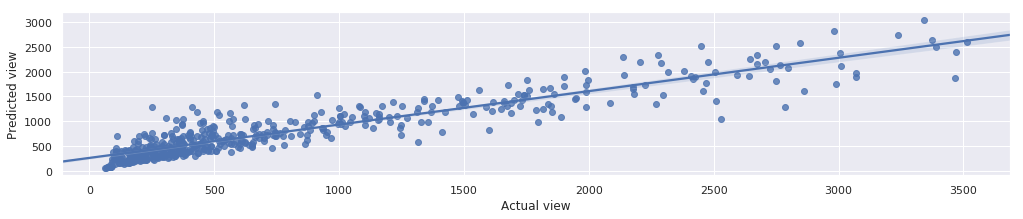

In [146]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

In [153]:
df_someXdata = pd.DataFrame(forest_reg.predict(X_test_set),list(y_test_set) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,124,860.4
1,1302,978.6
2,854,1141.2
3,153,571.4
4,162,345.8


AttributeError: module 'seaborn' has no attribute 'plt'

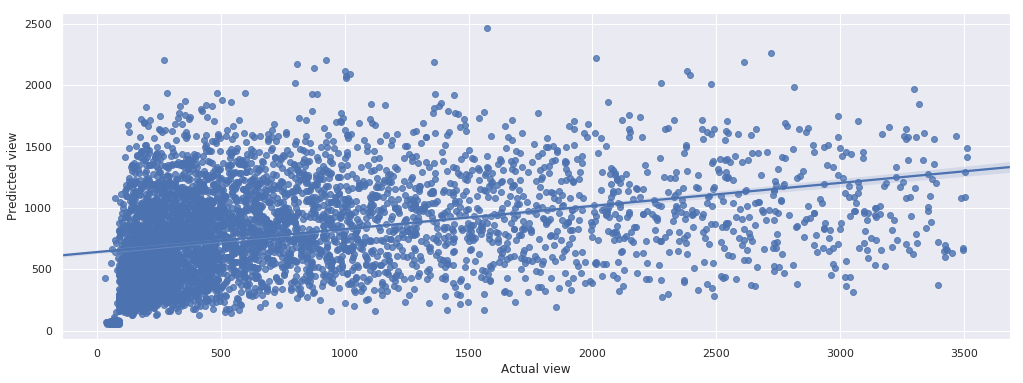

In [160]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


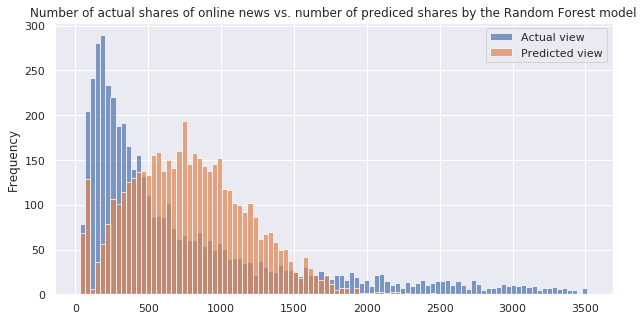

In [156]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [149]:
share_predictions = forest_reg.predict(X_train_set)
forest_mse = mean_squared_error(y_train_set, share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

312.19425297128106

In [150]:
forest_mae = mean_absolute_error(y_train_set, share_predictions)
print(forest_mae) #with outliers:1424

208.55795442775764


In [151]:
view_predictions = forest_reg.predict(X_test_set)
forest_mse = mean_squared_error(y_test_set, view_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers: 11648.966

721.1746555538216

In [152]:
print(forest_mse)
print(forest_rmse)

520092.8838131732
721.1746555538216


In [114]:
forest_mae = mean_absolute_error(y_test_set, view_predictions)
print(forest_mae)

524.6834092792046


In [53]:
scores = cross_val_score(forest_reg, X_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [805.36333681 781.83780209 791.34093969 814.26385549 816.54016442
 794.52998855 791.59340531 802.54479545 767.07220072 809.46507595]
Mean: 797.4551564494581
Standard deviation: 14.58347673582271


### Find important feature

In [55]:
from sklearn.model_selection import GridSearchCV


In [56]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [57]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

874.618745341377 {'max_features': 2, 'n_estimators': 3}
795.2673215011491 {'max_features': 2, 'n_estimators': 10}
884.1747458158068 {'max_features': 3, 'n_estimators': 3}
795.4112334346551 {'max_features': 3, 'n_estimators': 10}
875.3606006868971 {'max_features': 4, 'n_estimators': 3}
795.8611744642008 {'max_features': 4, 'n_estimators': 10}
877.3385560981584 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
792.7878872466318 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
879.1788367504474 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
794.5922778677334 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
880.3860409355249 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
796.8371744168073 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [58]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


In [59]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [60]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_set, y_train_set)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7125c110f0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7125c11390>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [61]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

785.8226719351429 {'max_features': 7, 'n_estimators': 15}
806.7961588228347 {'max_features': 3, 'n_estimators': 8}
808.3496690869127 {'max_features': 5, 'n_estimators': 7}
772.0377965402002 {'max_features': 2, 'n_estimators': 19}
796.4012000071232 {'max_features': 7, 'n_estimators': 11}
850.9831504207991 {'max_features': 3, 'n_estimators': 4}
932.510545803883 {'max_features': 3, 'n_estimators': 2}
820.1707468574708 {'max_features': 4, 'n_estimators': 6}
1078.0911327585259 {'max_features': 2, 'n_estimators': 1}
789.4285202336529 {'max_features': 4, 'n_estimators': 12}


In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.63426229e-02, 2.80715009e-02, 2.24396204e-02, 3.04777274e-02,
       2.49524668e-02, 1.71324100e-02, 4.59510501e-02, 2.11951902e-02,
       4.17588109e-04, 1.86696383e-02, 6.45404914e-04, 4.98024898e-03,
       1.71629625e-03, 9.26626123e-03, 3.37456255e-06, 1.84485447e-03,
       4.08383467e-03, 3.30270845e-03, 2.61370260e-03, 4.95286644e-03,
       6.09952130e-03, 4.07595928e-03, 1.19862148e-03, 2.84621729e-03,
       3.92552168e-03, 1.86331816e-03, 1.11608756e-03, 2.29533911e-03,
       1.29634570e-03, 1.38144611e-04, 4.72811929e-05, 6.85948035e-04,
       1.15738167e-03, 6.42639413e-04, 1.60034787e-04, 2.56635765e-02,
       2.52354293e-02, 2.68496399e-03, 8.01035154e-04, 7.65500585e-06,
       6.27924984e-03, 1.58829202e-03, 6.59436349e-03, 7.45369899e-03,
       8.91938102e-05, 5.84792853e-06, 3.81114400e-03, 7.53580772e-03,
       1.13276018e-02, 3.47168163e-02, 3.59391357e-02, 5.38428732e-03,
       6.01343794e-03, 5.41338386e-03, 5.87591195e-03, 5.24944805e-03,
      

In [63]:
input_pbs_feature.columns.drop('view')

Index(['hour', 'numTag', 'numToken', 'numChar', 'month', 'year', 'timeDelta',
       'num_noun', 'num_pronoun', 'num_verb', 'num_preverb', 'num_determiner',
       'num_adverb', 'num_classifier', 'num_conjunction', 'num_preposition',
       'is_environment', 'is_politic', 'is_health', 'is_crime', 'is_social',
       'is_inter', 'is_sport', 'is_economic', 'is_region', 'is_art',
       'is_lifestyle', 'is_disaster', 'is_south', 'is_special_report',
       'is_article', 'is_agriculture', 'is_education', 'is_women', 'is_asian',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_len', 'num_location', 'num_money', 'num_organization',
       'num_person', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'is_Mon', 'is_Tue', 'is_Wed',
       'is_Thu', 'is_Fri', 'is_Sat', 'is_Sun', 'is_weekend', 'tag_pop_sum',
       'tag_pop_mean', 'tag_top_pop_sum', 'tag_top_pop_mean', 'num_tag_pop',
       'tag_top_worst_sum'

In [64]:
sorted(zip(feature_importances, input_pbs_feature.columns.drop('view')), reverse=True)

[(0.04595105008386024, 'timeDelta'),
 (0.035939135668052034, 'sim_worst'),
 (0.03471681626059973, 'sim_top'),
 (0.032805774995291026, 'tag_pop_sum'),
 (0.030842437099949983, 'tag_pop_mean'),
 (0.03047772742281773, 'numChar'),
 (0.02978210633842519, 'Topic 2'),
 (0.02970673652849119, 'Topic 9'),
 (0.028616454022250014, 'Topic 5'),
 (0.028370883692264863, 'Topic 4'),
 (0.028298057548567457, 'Topic 0'),
 (0.028287908562323116, 'Topic 3'),
 (0.028071500900581053, 'numTag'),
 (0.02739644574917165, 'Topic 6'),
 (0.026950290844093495, 'Topic 7'),
 (0.02683351199996679, 'Topic 1'),
 (0.026797891987857043, 'Topic 8'),
 (0.026742724809407953, 'Topic 11'),
 (0.02649998480933961, 'Topic 10'),
 (0.026342622864938325, 'hour'),
 (0.025663576487662508, 'nnoun_per_ntoken'),
 (0.025235429345835936, 'nverb_per_ntoken'),
 (0.02495246680253731, 'month'),
 (0.0224396203865277, 'numToken'),
 (0.02164491771397503, 'tag_top_pop_sum'),
 (0.02119519023343157, 'num_noun'),
 (0.018669638310654525, 'num_verb'),
 (0

In [65]:
df_nn = pd.DataFrame(feature_importances, input_pbs_feature.columns.drop('view'))
df_nn.reset_index(level=0, inplace=True)
df_nn.sort_values(0,ascending=False).rename(index=str, columns={"index": "Feature", 0: "importance"})

,Feature,importance
6,timeDelta,0.045951
50,sim_worst,0.035939
49,sim_top,0.034717
59,tag_pop_sum,0.032806
60,tag_pop_mean,0.030842
3,numChar,0.030478
71,Topic 2,0.029782
78,Topic 9,0.029707
74,Topic 5,0.028616
73,Topic 4,0.028371


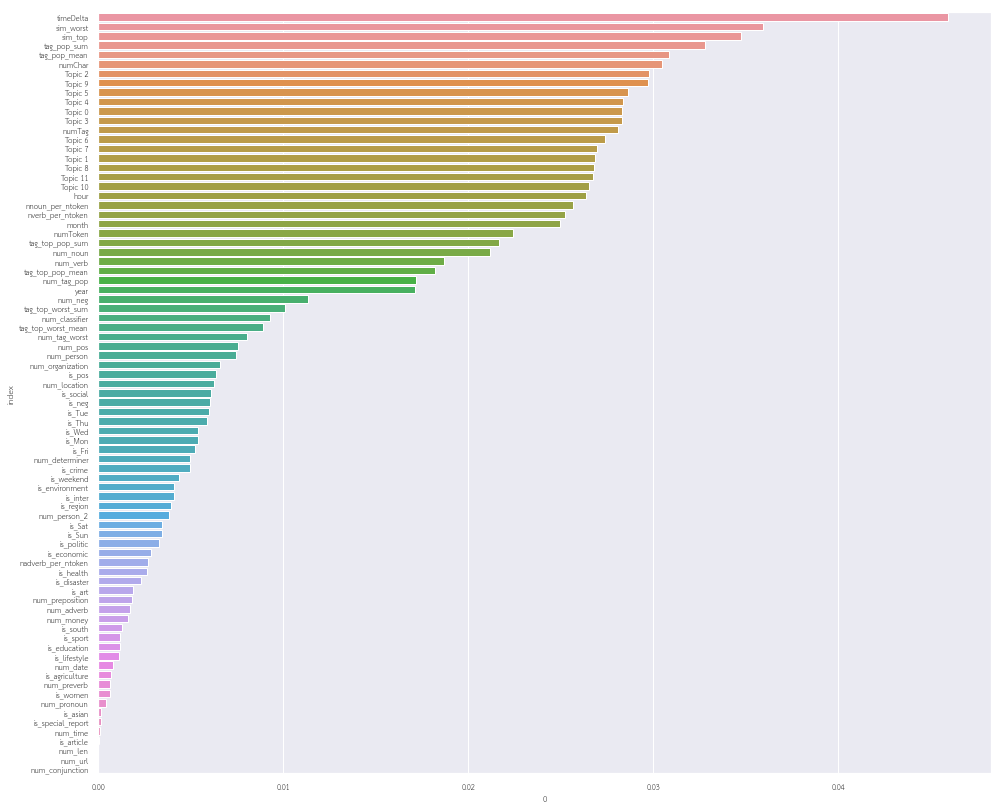

In [66]:
f, ax = plt.subplots(figsize=(16, 14))
sns.set_color_codes("pastel")
ax = sns.barplot( y='index', x= 0, data=df_nn.sort_values([0], ascending=[False]))

### Evaluate

In [67]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

797.5741584947516

In [68]:
some_X_data = X_test_set.iloc[:] #seems to be working also w-o .iloc!
some_y_data = y_test_set.iloc[:] #seems to be working also w-o .iloc!

Predicted_shares = list(final_model.predict(some_X_data)) 

Actual_shares = list(some_y_data)

final_data = [Predicted_shares, Actual_shares]

In [69]:
sorted(zip(Predicted_shares, Actual_shares), reverse=True);

In [70]:
df_shares = pd.DataFrame(Predicted_shares, Actual_shares)   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP[:50]

,Actual shares,Predicted shares
0,1554,991.7
1,2109,823.1
2,335,1059.2
3,2077,1360.7
4,269,1521.9
5,898,1370.6
6,1058,1122.8
7,373,856.8
8,959,1044.4
9,1143,1238.4


AttributeError: module 'seaborn' has no attribute 'plt'

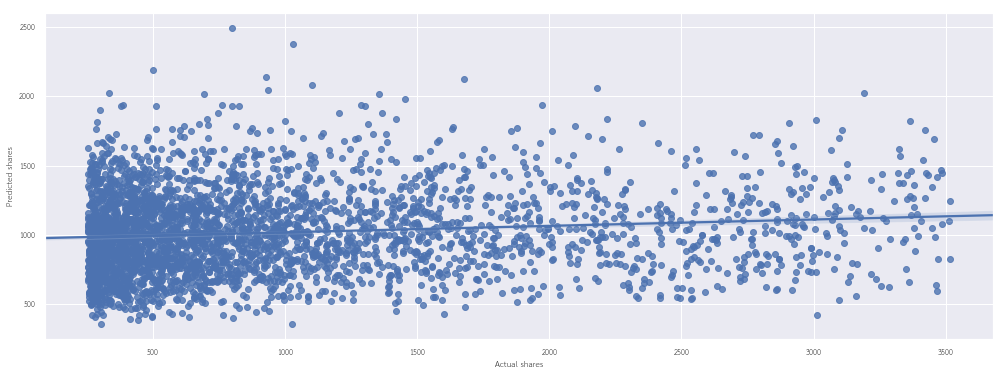

In [71]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_shares_AvsP["Actual shares"], y=df_shares_AvsP["Predicted shares"])
sns.plt.show()

/home/burin/py_36_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


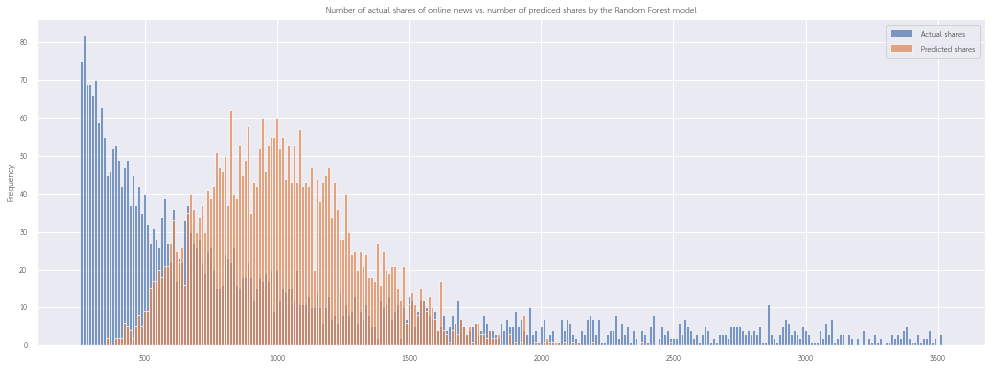

In [72]:
fig_size[0]=17.0
fig_size[1]=6.0

df_shares_AvsP.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [73]:
from sklearn.metrics import r2_score

r2_score( Actual_shares, Predicted_shares)

-0.05406969193719546

In [158]:
input_pbs[:50]

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment,timeDelta,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,is_environment,is_politic,is_health,is_crime,is_social,is_inter,is_sport,is_economic,is_region,is_science,is_art,is_lifestyle,is_disaster,is_south,is_special_report,is_article,is_agriculture,is_education,is_women,is_asian,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,sim_top,sim_worst,is_Mon,is_Tue,is_Wed,is_Thu,is_Fri,is_Sat,is_Sun,is_weekend,tag_pop_sum,tag_pop_mean,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,is_pos,is_neg
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควันข้ามแดน,2019-05-04,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม่,เชียงราย,ดอยหลวงเชียงดาว,ไฟป่า,หมอกควันข้ามแดน,ThaiPBSnews,ไทยพีบีเอส",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข้าม,แดน",11,43,2562-04,4,2562,pos,0,8,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.727273,0.272727,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.720796,0.726361,0,0,0,0,1,0,0,0,1234,154,0,0,0,0,0,0,1,0
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัดเลือกตั้งใหม่ 3 เขต กทม.",2019-05-04,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,เขต,กทม.",9,46,2562-04,4,2562,pos,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.888889,0.111111,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.797819,0.712586,0,0,0,0,1,0,0,0,762,190,1,1,1,0,0,0,1,0
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,2019-05-04,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กรมการค้าภายใน,ThaiPBSnews,ThaiPBS,ไทยพีบีเอส,ข่าวไทยพีบีเอส",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.800000,0.200000,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.648916,0.646782,0,0,0,0,1,0,0,0,148,29,2,1,2,0,0,0,1,0
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,2019-05-04,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg,0,4,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0.428571,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.716590,0.586499,0,0,0,0,1,0,0,0,72,36,4,2,2,0,0,0,0,1
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",2019-05-04,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่นเรศวร,ไทยพีบีเอส,ThaiPBSnews",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.857143,0.142857,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.612798,0.561536,0,0,0,0,1,0,0,0,295,98,19,6,3,0,0,0,0,1
5,พิธีพลีกรรมตักน้ำจากแหล่งน้ำศักดิ์สิทธิ์สำคัญ 76 จังหวัด,2019-05-04,FRI,17:59,4155,สังคม,"พระราชพิธีบรมราชาภิเษก,รัชกาลที่ 10,พลีกรรมตักน้ำจากแหล่งน้ำศักดิ์สิทธิ์,น้ำอภิเษก,ThaiPBSnews",17,5,"พิธีพลีกรรม,ตัก,น้ำ,แหล่ง,น้ำ,ศักดิ์สิทธิ์,จังหวัด",7,44,2562-04,4,2562,neg,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.579392,0.616058,0,0,0,0,1,0,0,0,63,15,8,4,2,0,0,0,0,1
6,ปิดล้อมตลาดโรงเกลือรวบแรงงานข้ามแดนผิด กม.,2019-05-04,FRI,17:53,428,อาชญากรรม,"ตลาดโรงเกลือ,แรงงานกัมพูชา,ละเมิดลิขสิทธิ์,ไทยพีบีเอส,ข่าวไทยพีบีเอส",17,5,"ล้อม,ตลาด,โรงเกลือ,รวบ,แรงงาน,ข้าม,แดน,กม.",8,35,2562-04,4,2562,neg,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.875000,0.125000,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.512310,0.551208,0,0,0,0,1,0,0,0,25,8,2,2,1,0,0,0,0,1
7,เลือกตั้ง 2562: ลุ้น 25 พรรคการเมืองได้ ส.ส.ปาร์ตี้ลิส

In [ ]:
# input_pbs = pd.read_cs('notebook6-extractFeature-thispbs.csv')